# Image Transformations

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def translate(img, x, y):
    '''
    Translates an image (img) along the x and y axes by (x, y) pixels.
    Returns the translated image.
    
    Parameters:
    img: image to be translated
    x: number of pixels to translate the image along the x axis
    y: number of pixels to translate the image along the y axis
    '''
    M = np.float32([[1, 0, x],
                     [0, 1, y]])
    translated = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
    return translated

In [3]:
def rotate(img, theta):
    '''
    Rotates an image (img) by an angle (theta) in degrees.
    Returns the rotated image.
    
    Parameters:
    img: image to be rotated
    theta: angle in degrees to rotate the image
    '''
    M = cv2.getRotationMatrix2D((img.shape[1] // 2, img.shape[0] // 2), theta, 1.0)
    rotated = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
    return rotated

In [4]:
def scale(img, scale):
    '''
    Scales an image (img) by a factor of (scale).
    Returns the scaled image.
    
    Parameters:
    img: image to be scaled
    scale: factor to scale the image by
    '''
    M = np.float32([[scale, 0, 0],
                    [0, scale, 0]])
    scaled = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
    return scaled

In [5]:
def shear(img, x, y):
    '''
    Shears an image (img) by a factor to its length (y) and width (w).
    Returns the sheared image.
    
    Parameters:
    img: image to be sheared
    x: factor to shear the image along the x axis
    y: factor to shear the image along the y axis
    '''
    M = np.float32([[1, x, 0],
                    [y, 1, 0]])
    sheared = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
    return sheared

In [6]:
def reflect(img, axis):
    '''
    Reflects an image (img) along an axis (axis).
    Returns the reflected image.
    
    Parameters:
    img: image to be reflected
    axis: axis to reflect the image along
    '''
    if 'x' in axis.lower():
        reflected = cv2.flip(img, 1)
    if 'y' in axis.lower():
        reflected = cv2.flip(img, 0)
    return reflected

In [7]:
def visualize(img):
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [8]:
def multiple_image_load():
    '''
    Loads multiple images from a list of image paths (img_paths).
    Returns a list of images.
    
    Parameters:
    img_paths: list of image paths
    '''
    
    images, img_paths = [], []
    c = int(input('Enter number of files: '))
    for i in range(c):
        img_paths.append(input(f'Enter image path {i + 1}/{c} : '))
    for path in img_paths:
        images.append(cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB))
    return images

In [9]:
def images_transform(*images):
    '''
    Transforms multiple images (images) using the functions defined above.
    Prompts the user to enter the parameters for each transformation.
    
    Parameters:
    images: list of images to be transformed
    '''

    transformations = input('Enter transformations to apply to images: ')
    
    for img in images:
        print('Original Image')
        visualize(img)
        if 'translate' in transformations.lower():
            print('Translated Image')
            visualize(translate(img, int(input('Enter x translation: ')), int(input('Enter y translation: '))))
        if 'rotate' in transformations.lower():
            print('Rotated Image')
            visualize(rotate(img, float(input('Enter rotation angle: '))))
        if 'scale' in transformations.lower():
            print('Scaled Image')
            visualize(scale(img, float(input('Enter scale factor: '))))
        if 'shear' in transformations.lower():
            print('Sheared Image')
            visualize(shear(img, float(input('Enter x shear factor: ')), float(input('Enter y shear factor: '))))
        if 'reflect' in transformations.lower():
            print('Reflected Image')
            visualize(reflect(img, input('Enter axis to reflect image along: ')))

Original Image


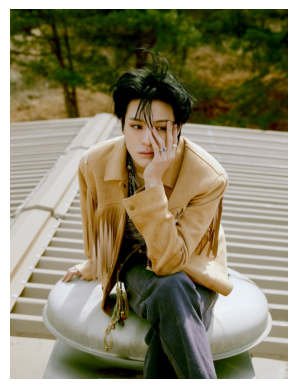

In [10]:
def main():
    # img = cv2.imread('images/img1.webp')
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # visualize(img)
    
    # # Translate the image 100 pixels to the right and 50 pixels down
    # translated = translate(img, 100, 50)
    # visualize(translated)
    
    # # Rotate the image 45 degrees counter-clockwise
    # rotated = rotate(img, 45)
    # visualize(rotated)
    
    # # Scale the image by 50%
    # scaled = scale(img, 0.5)
    # visualize(scaled)
    
    # # Shear the image by 0.2 horizontally and 0.3 vertically
    # sheared = shear(img, 0.2, 0)
    # visualize(sheared)
    
    # # Reflect the image along the x-axis
    # reflected = reflect(img, 'x y')
    # visualize(reflected)

    imgs = multiple_image_load()
    images_transform(*imgs)

if __name__ == '__main__':
    main()